In [2]:
from keras.datasets import imdb

C:\Users\coroi\Anaconda3\envs\data-science\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words  =10000)

In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print(train_labels[0])
print(train_labels[1])

1
0


In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]]
)
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(train_data.shape, x_train.shape)
print(x_train[0])

(25000,) (25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [8]:
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")
print(y_train[0:10])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [11]:
#from keras import losses
#from keras import optimizers
#from keras import metrics

#model.compile(
#    optimizer=optimizers.RMSprop(lr = 0.001),
#    loss=losses.binary_crossentropy,
#    metrics=[metrics.binary-accuracy]
#)

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
print(x_val.shape, partial_x_train.shape, x_test.shape)
print(y_val.shape, partial_y_train.shape, y_test.shape)

(10000, 10000) (15000, 10000) (25000, 10000)
(10000,) (15000,) (25000,)


In [13]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs = 4,
    batch_size = 512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 249us/step - loss: 0.5084 - acc: 0.7815 - val_loss: 0.3796 - val_acc: 0.8684
Epoch 2/4
15000/15000 [==============================] - 3s 186us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/4
15000/15000 [==============================] - 3s 167us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3087 - val_acc: 0.8712
Epoch 4/4
15000/15000 [==============================] - 2s 159us/step - loss: 0.1750 - acc: 0.9439 - val_loss: 0.2840 - val_acc: 0.8830


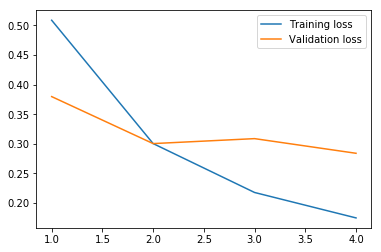

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label="Validation loss")
plt.legend()
plt.show()

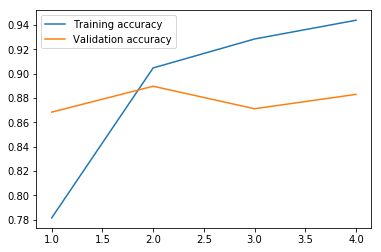

In [15]:
plt.clf() 

acc_values = history.history["acc"]
val_acc_values = history_dict["val_acc"]
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, label="Training accuracy")
plt.plot(epochs, val_acc_values, label="Validation accuracy")
plt.legend()
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_loss, test_accuracy)

NameError: name 'test_images' is not defined